In [1]:
import keras
from keras.layers import Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import UpSampling2D
from keras.layers import Concatenate
from keras.layers import Lambda 

import tensorflow as tf


from keras import backend as K



Using TensorFlow backend.


In [2]:
import scipy.io as scio
import numpy as np    
import os
import matplotlib.pyplot as plt
from scipy.misc import imsave
from scipy import ndimage, misc
from numpy import unravel_index
from operator import sub

In [3]:
images = []
for root, dirnames, filenames in os.walk("Dataset/Train_images/"):
    for filename in filenames:
        filepath = os.path.join(root, filename)
        image = ndimage.imread(filepath, mode="L")
        images.append(image)

In [4]:
print (len(image))


496


In [5]:
labels = np.load('train_labels.npy')
labels_list = []
for i in range(len(labels)):
    labels_list.append(labels[i])

In [6]:
print (len(labels_list))
print (type(labels_list[0]))

images=np.array(images)
print(images.shape[0])
images = images.reshape(images.shape[0],496,64,1)

print(images[0].shape)
train_labels = np.random.choice(770,500,replace = False)
print(sorted(train_labels))
train_images = []
for i in train_labels:
    train_images.append(images[i])
test_labels = [x for x in range(700) if x not in train_labels]
print(test_labels)
test_images = []
for i in test_labels:
    test_images.append(images[i])

770
<type 'numpy.ndarray'>
770
(496, 64, 1)
[0, 1, 2, 3, 4, 5, 7, 8, 10, 13, 16, 17, 19, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 39, 40, 42, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 56, 57, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 83, 84, 85, 86, 87, 88, 91, 92, 93, 96, 100, 103, 105, 108, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 131, 134, 135, 136, 137, 139, 141, 142, 143, 144, 146, 147, 148, 149, 150, 151, 153, 154, 156, 157, 158, 159, 161, 163, 166, 169, 170, 171, 172, 174, 175, 178, 180, 181, 182, 183, 184, 185, 187, 189, 191, 192, 193, 196, 197, 198, 200, 201, 204, 207, 209, 210, 211, 212, 215, 216, 219, 223, 224, 225, 228, 229, 231, 233, 234, 235, 236, 237, 238, 243, 244, 245, 246, 251, 254, 255, 256, 257, 258, 260, 262, 263, 264, 265, 266, 268, 271, 272, 273, 275, 278, 280, 281, 283, 284, 287, 288, 289, 290, 293, 294, 295, 296, 297, 299, 301, 306, 308, 309, 310, 311, 312, 313,

In [7]:
print (len(train_images))
print (len(train_labels))
print (np.array(train_labels).shape)

500
500
(500,)


In [8]:
arg_1 = tf.placeholder(tf.float32,shape=(None,248,32,64))
index_mask_1 = tf.placeholder(tf.bool,shape=(None,496,64,64))

arg_2 = tf.placeholder(tf.float32,shape=(None,248,32,64))
index_mask_2 = tf.placeholder(tf.bool,shape=(None,496,64,64))

arg_3 = tf.placeholder(tf.float32,shape=(None,248,32,64))
index_mask_3 = tf.placeholder(tf.bool,shape=(None,496,64,64))

In [9]:
def maxpool_1(x):
    print(type(x))
    print(x.shape)
    y = x[0,:,:,:]
    t = K.argmax(y)
    print(type(t))
    print(t.shape)
    print(type(y))
    print(y.shape)
    outputs = tf.nn.max_pool_with_argmax(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='VALID')
    arg_1=tf.cast(outputs[1],tf.float32)
    upsampled_output=UpSampling2D(size=(2,2))(outputs[0])
    print(upsampled_output.dtype)
    print(arg_1.dtype)
    index_mask_1=K.tf.equal(x,upsampled_output)
    print((arg_1.shape))
    return outputs[0]

def maxpool_2(x):
    print(type(x))
    print(x.shape)
    y = x[0,:,:,:]
    t = K.argmax(y)
    print(type(t))
    print(t.shape)
    print(type(y))
    print(y.shape)
    outputs = tf.nn.max_pool_with_argmax(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='VALID')
    arg_2=tf.cast(outputs[1],tf.float32)
    upsampled_output=UpSampling2D(size=(2,2))(outputs[0])
    print(upsampled_output.dtype)
    print(arg_2.dtype)
    index_mask_2=K.tf.equal(x,upsampled_output)
    print((arg_2.shape))
    return outputs[0]

def maxpool_3(x):
    print(type(x))
    print(x.shape)
    y = x[0,:,:,:]
    t = K.argmax(y)
    print(type(t))
    print(t.shape)
    print(type(y))
    print(y.shape)
    outputs = tf.nn.max_pool_with_argmax(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='VALID')
    arg_3=tf.cast(outputs[1],tf.float32)
    upsampled_output=UpSampling2D(size=(2,2))(outputs[0])
    print(upsampled_output.dtype)
    print(arg_3.dtype)
    index_mask_3=K.tf.equal(x,upsampled_output)
    print((arg_3.shape))
    return outputs[0]

def shape(x):
    shape = list(x)
    shape[1]= shape[1]//2
    shape[2]= None
    return tuple(shape)

In [10]:
print((arg_1.shape))

(?, 248, 32, 64)


In [11]:
def unpool_1(input):
    mask_shape = index_mask.get_shape().as_list()
    input_shape = input.get_shape().as_list()
    pool_size = (mask_shape[1] / input_shape[1], None)
    on_success = UpSampling2D(size=(2,2))(input)
    on_fail = K.zeros_like(on_success)
    print()
    return K.tf.where(index_mask, on_success, on_fail)

def unpool_2(input):
    mask_shape= index_mask.get_shape().as_list()
    input_shape = input.get_shape().as_list()
    pool_size = (mask_shape[1] / input_shape[1], None)
    on_success = UpSampling2D(size=(2,2))(input)
    on_fail = K.zeros_like(on_success)
    print()
    return K.tf.where(index_mask, on_success, on_fail)

def unpool_3(input):
    mask_shape = index_mask.get_shape().as_list()
    input_shape = input.get_shape().as_list()
    pool_size = (mask_shape[1] / input_shape[1], None)
    on_success = UpSampling2D(size=(2,2))(input)
    on_fail = K.zeros_like(on_success)
    print()
    return K.tf.where(index_mask, on_success, on_fail)

In [12]:
def unpool_shape(x):
    shape = list(x)
    shape[1]= shape[1]*2
    shape[2]= None
    return tuple(shape)

In [13]:
# Defines the input tensor
inputs = Input(shape=(496,None,1))

L1 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(inputs)
L2 = BatchNormalization()(L1)
L3 = Lambda(maxpool_1,output_shape = shape)(L2)
#L3 = MaxPooling2D(pool_size=(2,2))(L2)
L4 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(L3)
L5 = BatchNormalization()(L4)
L6 = Lambda(maxpool_2,output_shape = shape)(L5)
#L6 = MaxPooling2D(pool_size=(2,2))(L5)
L7 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(L6)
L8 = BatchNormalization()(L7)
L9 = Lambda(maxpool_3,output_shape = shape)(L8)
#L9 = MaxPooling2D(pool_size=(2,2))(L8)
L10 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(L9)
L11 = BatchNormalization()(L10)
#L12 = UpSampling2D(size = (2,2))(L11)
L12 = Lambda(unpool_3,output_shape = shape)(L11)
L13 = Concatenate(axis = 3)([L8,L12])
L14 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(L13)
L15 = BatchNormalization()(L14)
#L16 = UpSampling2D(size= (2,2))(L15)
L16 = Lambda(unpool_2,output_shape=unpool_shape)(L15)
L17 = Concatenate(axis = 3)([L16,L5])
L18 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(L17)
L19 = BatchNormalization()(L18)
L20 = Lambda(unpool_1,output_shape=unpool_shape)(L19)
#L20 = UpSampling2D(size=(2,2),name = "Layer19")(L19)
L21 = Concatenate(axis=3)([L20,L2])
L22 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(L21)
L23 = BatchNormalization()(L22)
L24 = Conv2D(8,kernel_size=(1,1),activation = 'softmax',padding = "same")(L23)

model = Model(inputs = inputs, outputs = L24)
model.summary()

<class 'tensorflow.python.framework.ops.Tensor'>
(?, 496, ?, 64)
<class 'tensorflow.python.framework.ops.Tensor'>
(496, ?)
<class 'tensorflow.python.framework.ops.Tensor'>
(496, ?, 64)
<dtype: 'float32'>
<dtype: 'float32'>
(?, 248, ?, 64)
<class 'tensorflow.python.framework.ops.Tensor'>
(?, 248, ?, 64)
<class 'tensorflow.python.framework.ops.Tensor'>
(248, ?)
<class 'tensorflow.python.framework.ops.Tensor'>
(248, ?, 64)
<dtype: 'float32'>
<dtype: 'float32'>
(?, 124, ?, 64)
<class 'tensorflow.python.framework.ops.Tensor'>
(?, 124, ?, 64)
<class 'tensorflow.python.framework.ops.Tensor'>
(124, ?)
<class 'tensorflow.python.framework.ops.Tensor'>
(124, ?, 64)
<dtype: 'float32'>
<dtype: 'float32'>
(?, 62, ?, 64)
()


ValueError: Dimension 1 in both shapes must be equal, but are 124 and 496 for 'lambda_4/Select' (op: 'Select') with input shapes: [?,496,64,64], [?,124,?,64], [?,124,?,64].

In [9]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
train_images_2=np.array(images)
train_labels_2=np.array(labels_list)
model.fit(train_images_2,train_labels_2,batch_size=8,epochs=10,validation_split = 0.33)

Train on 515 samples, validate on 255 samples
Epoch 1/10
515/515 [==============================] - 1375s - loss: 1.4785 - acc: 0.7307 - val_loss: 1.8171 - val_acc: 0.8342
Epoch 2/10
515/515 [==============================] - 1358s - loss: 0.9489 - acc: 0.7920 - val_loss: 1.1931 - val_acc: 0.7953
Epoch 3/10
515/515 [==============================] - 1431s - loss: 0.7919 - acc: 0.8005 - val_loss: 1.2294 - val_acc: 0.7746
Epoch 4/10
515/515 [==============================] - 1372s - loss: 0.7093 - acc: 0.8020 - val_loss: 0.6476 - val_acc: 0.8346
Epoch 5/10
515/515 [==============================] - 1476s - loss: 0.6552 - acc: 0.8054 - val_loss: 0.6271 - val_acc: 0.8318
Epoch 6/10
515/515 [==============================] - 1647s - loss: 0.7162 - acc: 0.8035 - val_loss: 0.6038 - val_acc: 0.8344
Epoch 7/10
515/515 [==============================] - 1455s - loss: 0.6374 - acc: 0.8073 - val_loss: 0.5707 - val_acc: 0.8348
Epoch 8/10
515/515 [==============================] - 1467s - loss: 0.63

In [11]:
model.save_weights("weights.h5")

In [55]:
testing_image = ndimage.imread('Dataset/testing_image_4.png',mode = 'L')

In [56]:
testing_image = np.array(testing_image)
print(testing_image.shape[0])

496


In [57]:
testing_image = testing_image.reshape(1,496,64,1)

In [58]:
prediction = model.predict(testing_image)

In [59]:
print(prediction.shape)

(1, 496, 64, 8)


In [60]:
prediction = np.squeeze(prediction,axis = 0)

In [61]:
print(prediction.shape)


(496, 64, 8)


In [62]:
print (prediction)

[[[  9.90431845e-01   5.23849914e-04   2.38480396e-03 ...,   3.14290333e-03
     7.15359987e-04   9.47752633e-05]
  [  9.95876908e-01   1.26564744e-04   5.17529435e-04 ...,   2.05338211e-03
     3.22114036e-04   4.62890821e-05]
  [  9.91709769e-01   3.47106252e-04   1.40436867e-03 ...,   3.52300471e-03
     4.66498459e-04   1.45449289e-04]
  ..., 
  [  9.93215978e-01   2.89540971e-04   1.14223047e-03 ...,   2.86238850e-03
     4.15960822e-04   1.21896235e-04]
  [  9.94165242e-01   1.88748279e-04   9.98849748e-04 ...,   2.88870698e-03
     5.12290921e-04   5.69161930e-05]
  [  9.77184176e-01   1.62097695e-03   5.97098330e-03 ...,   8.09637923e-03
     1.31334132e-03   5.07012708e-04]]

 [[  9.90255058e-01   3.38861166e-04   1.74046448e-03 ...,   4.34618024e-03
     1.35297398e-03   1.18468612e-04]
  [  9.95023370e-01   1.01163852e-04   3.01213498e-04 ...,   2.36597634e-03
     9.77306976e-04   7.58161477e-05]
  [  9.88762558e-01   4.33083362e-04   1.21312588e-03 ...,   5.10587031e-03
  

In [63]:
print(prediction[260][45])

[ 0.18668322  0.02075981  0.07049716  0.08813264  0.0905104   0.37279558
  0.11087015  0.059751  ]


In [64]:
s = [1,2,3,4]
print(np.argmax(s))

3


In [65]:
print(prediction.shape)

(496, 64, 8)


In [66]:
output = np.zeros((496,64))

In [67]:
for i in range(496):
    for j in range(64):
        index = np.argmax(prediction[i][j])
        output[i][j] = index

In [68]:
print (output.shape)

(496, 64)


In [69]:
color= np.zeros((496,64,3))

In [70]:
for j in range(496):
    for k in range(64):
        if(output[j][k]==0):
            color[j][k] = [0,0,0]
        if(output[j][k]==1):
            color[j][k] = [128,0,0]
        if(output[j][k]==2):
            color[j][k] = [0,128,0]
        if(output[j][k]==3):
            color[j][k] = [128,128,0] 
        if(output[j][k]==4):
            color[j][k] = [0,128,128]
        if(output[j][k]==5):
            color[j][k] = [64,0,0]
        if(output[j][k]==6):
            color[j][k] = [192,0,0]
        if(output[j][k]==7):
            color[j][k] = [64,128,0]

In [71]:
plt.imshow(color)

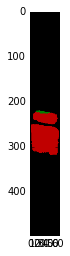

In [72]:
plt.show()